In [1]:
#------------------------------------
#  German Hernández/Código:2171842.
#-----------------------------------
import numpy as np
from scipy import optimize
from scipy import integrate
from matplotlib import pyplot as plt
from  sklearn.metrics import r2_score

In [2]:
#Función para realizar una regresion según el orden 
#Devuelve R^2,coeficientes y el grafico
def Reg(x,y,n):
	x=np.asarray(x)
	y=np.asarray(y)
	poli=np.polyfit(x,y,n)
	model=np.poly1d(poli)
	R2=r2_score(y,model(x))
	plt.scatter(x,y,color="red")
	plt.plot(x,model(x),"b-")
	plt.grid(True)
	return poli,R2,plt.show()

In [3]:
#Función para realizar una regresion según el orden 
#Devuelve R^2,coeficientes y el grafico
def Reg2(x0,xc,Nc,x1,y1,x2,y2,n1,n2):
	x1=np.asarray(x1)
	y1=np.asarray(y1)
	poli1=np.polyfit(x1,y1,n1)
	poli2=np.polyfit(x2,y2,n2)    
	model1=np.poly1d(poli1)
	model2=np.poly1d(poli2)    
	R21=r2_score(y1,model1(x1))
	R22=r2_score(y2,model2(x2))    
	plt.scatter(x1,y1,color="red")
	plt.scatter(x2,y2,color="magenta")    
	plt.plot(x1,model1(x1),"b--",label="t_p1")    
	plt.plot(x2,model2(x2),"c--",label="t_p2")    
	Px=np.asarray([xc,x0])
	Pc=np.asarray([Nc,Nc])  
	plt.plot(Px,Pc,color="orange",label="tac")    
	plt.xlabel("X")    
	plt.ylabel("N")        
	plt.legend(loc="best")        
	plt.grid(True)
	return poli1,poli2,R21,R22,plt.show()


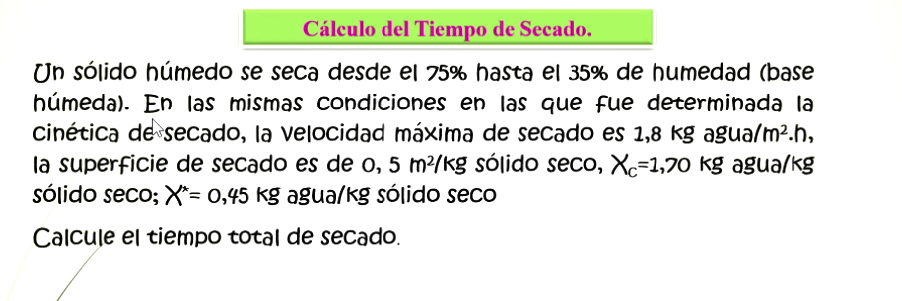

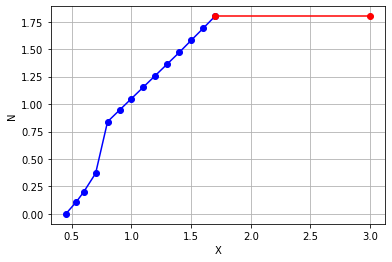

In [4]:
#Ejercicio de clase
#Datos del periodo poscritico #Se le debe agg el X* para poder cerrar 
X=np.asarray([1.70,1.60,1.50,1.40,1.30,1.20,1.10,1.00,.90,.80,.70,.60,7/13,0.45])
N=np.asarray([1.80,1.689,1.580,1.470,1.365,1.260,1.155,1.050,0.945,.840,.370,.200,.110,0])
x0=3
xc=1.7
Nc=1.8
Px=np.asarray([xc,x0])
Pc=np.asarray([Nc,Nc])
plt.plot(X,N,"bo-")
plt.plot(Px,Pc,"ro-")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("N")
plt.show()

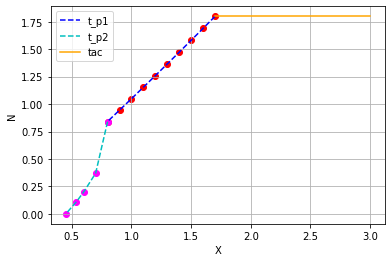

Coeficientes regresión 1 : [0.03901515 0.96597727 0.04374848]
R^2 : 0.999983032110514
Coeficientes regresión 2 : [ 147.68877116 -337.93969979  288.99149464 -108.00161643   14.8185422 ]
R^2 : 1.0


In [5]:
#Reg2(x0,xc,Nc,x1,y1,x2,y2,n1,n2)
polis=Reg2(3,1.7,1.8,X[0:10],N[0:10],X[9:len(X)],N[9:len(X)],2,4)
print("Coeficientes regresión 1 :",polis[0])
print("R^2 :",polis[2])
print("Coeficientes regresión 2 :",polis[1])
print("R^2 :",polis[3])

In [6]:
#Integral para el periodo postcritico I
f1=lambda x:1/(0.03901515*x**2+0.96597727*x+0.04374848)
I1=integrate.quad(f1,0.8,1.7)
tp1=I1[0]*(1/0.5)
print("tp1= ",tp1)

#Integral para el periodo postcritico II
f2=lambda x:1/( 147.689*x**4 - 337.94*x**3 + 288.991*x**2 - 108.002*x+14.819)
I2=integrate.quad(f2,7/13,0.8)
tp2=I2[0]*(1/0.5)
print("tp2= ",tp2)
t=tp1+tp2+1.444
print("t=",t)

tp1=  1.434439300776
tp2=  1.937356974724625
t= 4.815796275500625


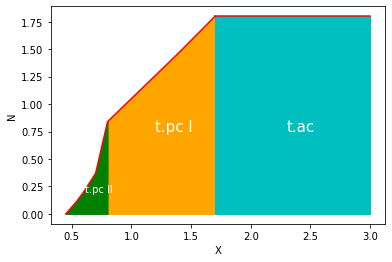

In [7]:
#Ejercicio de clase
#Datos del periodo poscritico #Se le debe agg el X* para poder cerrar 
X=np.asarray([1.70,1.60,1.50,1.40,1.30,1.20,1.10,1.00,.90,.80,.70,.60,7/13,0.45])
N=np.asarray([1.80,1.689,1.580,1.470,1.365,1.260,1.155,1.050,0.945,.840,.370,.200,.110,0])
x0=3
xc=1.7
Nc=1.8
Px=np.asarray([xc,x0])
Pc=np.asarray([Nc,Nc])
plt.fill_between(X, N, 0,where = (X >= .80) ,color = 'orange')
plt.fill_between(X, N, 0,where = (X <= .80) ,color = 'g')
plt.fill_between(Px, Pc, 0,where = (Px >= xc) ,color = 'c')
plt.plot(Px,Pc,"r-")
plt.plot(X,N,"r-")
plt.text(1.2,0.75,'t.pc I',color="white",fontsize=15)
plt.text(0.61,0.2,'t.pc II',color="white",fontsize=10)
plt.text(2.3,0.75,'t.ac',color="white",fontsize=15)
plt.xlabel("X")
plt.ylabel("N")
plt.show()


$$tac=1.444 \ h $$
$$\ tp_1=1.434 \ h$$
$$tp_2=1.937 \ h $$
El tac es menor que el postcritico (t2+t2) pero la cantidad de humedad que se retira en el tac es mucho mayor.

El tiempo de secado es:
$$\ t= \ 4.815 h $$


In [8]:
x1=np.asarray([1.70,1.60,1.50,1.40,1.30,1.20,1.10,1.00,.90,.80])
y1=np.asarray([1.80,1.689,1.580,1.470,1.365,1.260,1.155,1.050,0.945,.840])
integrate.trapz(y1,x1)*(-1)*(1/0.5)

2.3668

X = [3.   2.2  1.32 0.84 0.44 0.2  0.08 0.05]
N = [5.  5.  4.5 4.  3.5 2.  1.  0. ]


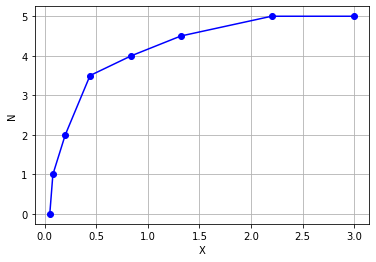

In [4]:
Wp=np.asarray([10,8.0,5.8,4.6,3.6,3.0,2.7])
Np=np.asarray([5,5,4.5,4.0,3.5,2.0,1.0,0]) #->Se deben cerrar los datos X*=5%->N=0
X_eq=np.asarray([5/100])
Ssp=5*0.5 #kg
Ap=1*0.6
Xp=(Wp-Ssp)/Ssp
Xf=(0.14)/(1-0.14)
#Se deben cerrar los datos con el X*
Xp=np.concatenate((Xp,X_eq),axis=0)
print("X =",Xp)
print("N =",Np)
plt.plot(Xp,Np,"bo-")
plt.xlabel("X")
plt.ylabel("N")
plt.grid(True)
plt.show()

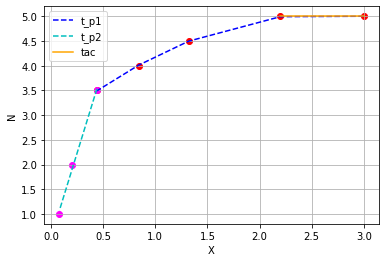

Coef. tpI : [-0.32916378  1.72230455  2.79823404]
R^2 : 0.9998439083365535
Coef. tpII : [6.8452381  0.52380952]
R^2 : 0.9943609022556391


In [17]:
R_grep=Reg2(3,2.2,5,Xp[0:5],Np[0:5],Xp[4:7],Np[4:7],2,1)
print("Coef. tpI :",R_grep[0])
print("R^2 :",R_grep[2])
print("Coef. tpII :",R_grep[1])
print("R^2 :",R_grep[3])

In [23]:
#Integral para el periodo postcritico I
f1c=lambda x:1/(-0.0633*x**3 - 0.0722*x**2 + 1.4227*x + 2.8934)
I1c=integrate.quad(f1c,0.44,1)
tp1c=I1c[0]*(Ssp/Ap)
print("tp1= ",tp1c)

#Integral para el periodo postcritico II
f2c=lambda x:1/(-5.787*x**2 + 9.9537*x + 0.2407)
I2c=integrate.quad(f2c,0.1627,0.44)
tp2c=I2c[0]*(Ssp/Ap)
print("tp2= ",tp2c)
#Tiempo de secado
t_total=tp1c+tp2c
print("t =",t_total)

tp1=  0.6074629952423918
tp2=  0.4495413813669971
t = 1.0570043766093888


In [ ]:
import sympy as sym
def LAGRANGE(xi,fi):
    xi = np.array(xi)
    fi = np.array(fi)
    # PROCEDIMIENTO
    # Polinomio de Lagrange
    n = len(xi)
    x = sym.Symbol('x')
    polinomio = 0
    divisorL = np.zeros(n, dtype = float)
    for i in range(0,n,1):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j  in range(0,n,1):
            if (j!=i):
                numerador = numerador*(x-xi[j])
                denominador = denominador*(xi[i]-xi[j])
        terminoLi = numerador/denominador
        polinomio = polinomio + terminoLi*fi[i]
        divisorL[i] = denominador
    # simplifica el polinomio
    polisimple = polinomio.expand()
    # para evaluación numérica
    px = sym.lambdify(x,polisimple)
    # Puntos para la gráfica
    muestras = 101
    a = np.min(xi)
    b = np.max(xi)
    pxi = np.linspace(a,b,muestras)
    pfi = px(pxi)
    # Salida
    np.set_printoptions(precision=3)
    #print('    valores de fi: ',fi)
    #print('divisores en L(i): ',divisorL)
    #print()
    #print('Polinomio de Lagrange, expresiones')
    #print(polinomio)
    #print()
    print('Polinomio de Lagrange: ')
    print(polisimple)
    #evaluar el polinomio#print('El valor interpolado es: ',px(0.05))
    # Gráfica
    plt.plot(xi,fi,'o', label = 'Puntos')
    plt.plot(pxi,pfi,"r-", label = 'Polinomio')
    plt.legend()
    plt.grid(True)
    plt.xlabel('xi')
    plt.ylabel('fi')
    plt.title('Interpolación Lagrange')
    return plt.show()
